<a href="https://colab.research.google.com/github/DomiStryj/MHE2023/blob/main/K_Route_Inspection_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem chińskiego listonosza/Route Inspection Problem

In [ ]:
!sudo apt update
!sudo apt install libcairo2-dev ffmpeg texlive texlive-latex-extra texlive-fonts-extra texlive-latex-recommended texlive-science tipa libpango1.0-dev
!pip install manim
!pip install IPython --upgrade

Hit:1 http://security.ubuntu.com/ubuntu focal-security InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Hit:3 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease
Hit:4 http://archive.ubuntu.com/ubuntu focal InRelease
Hit:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Hit:6 http://archive.ubuntu.com/ubuntu focal-updates InRelease
Hit:7 http://archive.ubuntu.com/ubuntu focal-backports InRelease
Hit:8 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Hit:9 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Hit:10 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Hit:11 http://ppa.launchpad.net/ubuntugis/ppa/ubuntu focal InRelease
Reading package lists... Done
Building dependency tree       
Reading state information... Done
38 packages can be upgraded. Run 'apt list --upgradable' to see them.
Reading package lists... Done
Building dependency tree       
R

# Opis problemu

Problem chińskiego listonosza polega na znalezieniu najkrótszej trasy do przejścia dla listonosza. Punktem startowym i kończowym jest poczta, miejsca, do których listonosz ma się udać z przesyłkami to wierzchołki grafu, a każda z ulic to krawędź.
Droga listonosza powinna wyglądać następująco:
1. listonosz odbiera przesyłki na poczcie
2. listonosz zanosi przesyłki do odbiorców, czyli musi dotrzeć do każdego z wierzchołków grafu, co najmniej jeden raz
3. listonosz kończy swoją trasę na poczcie.

Problem należy do problemów np, tylko wtedy, gdy graf nie zawiera cyklu Eulera.

Rozwiązaniem zadania jest znalezienie drogi, której suma wag krawędzi cyklu jest najmniejszą sumą wag krawędzi wszystkich takich cykli w grafie.

# Implementacja

# Przykład grafu, który można wykorzystać do wykonania zadania

Do wykonania zadania potrzebny będzie graf bez cyklu Eulera, czyli graf nieskierowany. Wierzchołek startowy i końcowy grafu to poczta, wierzchołki to skrzyżowania ulic, a ulice to krawędzie, które posiadają swoje wagi.



```
                   3
        (a)-----------------(b)
     1 /  |                  |  \1
      /   |                  |   \
     (c)  | 5               6|   (d)
      \   |                  |   /
     2 \  |         4        |  /1
        (e)------------------(f)
       
       a - b - d - f - d - b - f - e - c - a - c - e - a
```



In [ ]:
import ast
with open("graf.txt", 'r') as f:
    punkty, odcinki, dlugosci = map(ast.literal_eval, f.readlines())

załadowany plik zawiera : 


*   pierwszy wiersz: odwiedzane punkty np . a,b,c
*   drugi wiersz: odcinki na podstawie punktów np. ac, ae
*   trzeci wiersz : wartość poszególnych odcinków 



#Funkcja celu

In [ ]:
import numpy as np
import ast
import copy
import math
import random

In [ ]:
def funkcjaCelu(rozwiazanie, punkt, odcinki, dlugosci):
    suma = 0
    tmp = []
    try:
        for i in range(0, len(rozwiazanie), 1): # na podstawie kolejności odwiedzanych punktów przydzieliłam pasujące do nich odcinki
            odc = punkt[rozwiazanie[i] - 1] + punkt[rozwiazanie[i + 1] - 1]
            # print(odc)
            tmp.append(odc)      # wszystkie odcinki znajdują się w tablicy tmp
    except IndexError:
        pass
    # print(tmp)
    for x in range(0, len(tmp), 1):     # dodajemy długości odcinków na podstawie tablicy tmp
        for y in range(0, len(odcinki), 1):
            if tmp[x] == odcinki[y]:
                suma += dlugosci[y]
    return suma
  
print("Trasa jaką przybył nasz listanosz wynosi :",funkcjaCelu([1, 3, 5, 6, 4, 2, 1],punkty,odcinki,dlugosci))

Trasa jaką przybył nasz listanosz wynosi : 12


Powyższy kod to funkcja celu ,  która przyjmuje tablice z listą odwiedzanych punktów oraz dane  z załadowanego pliku czyli punkty ,  odcinki, oraz ich długości. W efekcie końcowym funkcja celu zwraca łączną wartość jaką przebył nasz listanosz na wyznaczonej trasie. 

# Losowy sąsiad

W kolejnym etapie ważnym jest, aby wylosować najlepszego sąsiada, czyli wierzchołek (dom), który ma odwiedzić listonosz. Najlepszy sąsiad jest równy wierzchołkowi, do którego dotarcia listonosz pokonuje najkrótszą drogę. 


In [ ]:
def losowySasiad(roz, punkty, odcinki):
    dl_max_roz = len(roz)   # maks. dł. rozwiązania
    ptk = int(random.randint(0, len(roz) - 1)) #losuje ptk z zakresu rozwiązania
    del roz[ptk + 1:]   # kasuję tablice od wybranego ptk
    for k in range(len(roz), dl_max_roz, 1):
        punkt = punkty[roz[-1] - 1] #sprawdzam ptk z konca skasowanej tablicy
        kolejne_wierzch = []
        for i in range(0, len(odcinki), 1):  # wyznaczam dostępne wierzchołki na podst. ptk z końca tablicy
            if odcinki[i][:1] == punkt:
                kolejne_wierzch.append(odcinki[i][1:])
        p = int(random.uniform(0, len(kolejne_wierzch))) #losujemy nowy wierzchołek dostępny z listy
        for j in range(0, len(punkty), 1):          #dopisuje nowy wierzchołek
            if punkty[j] == kolejne_wierzch[p]:
                roz.append(j + 1)
    return roz



# Generowanie losowej kolejności 

W celu zastosowania algorytmu , kolejnym krokiem jest wygenerowania losowej kolejności odwiedzania wierzchołów przez listonosza. Wraz ze znalezieniem losowego sąsiada, element generowania losowej kolejności jest potrzebny do wykonania algorytmu wspinaczkowego.

In [ ]:
def generowanieLosowejKolejnoci(wielkosc_rozw, punkty, odcinki):
    losowa_kolejnosc = [1]    #tablica zaczyna się domyślnie od punktu startu a=1 - poczta
    for k in range(0, wielkosc_rozw - 1, 1):
        punkt = punkty[losowa_kolejnosc[-1] - 1] #zmienna posiada informacje punktu w którym się znajdujemy
        kolejne_wierzch = []
        for i in range(0, len(odcinki), 1):   #petla wyznacza kolejne wierzchołki
            if odcinki[i][:1] == punkt:
                kolejne_wierzch.append(odcinki[i][1:])
        p = int(random.uniform(0, len(kolejne_wierzch))) #losujemy liczbę o wielkości tablicy w której znajdują się dostępne wierzchołki
        for j in range(0, len(punkty), 1):
            if punkty[j] == kolejne_wierzch[p]:  # dodajemy wylosowany wierzchołek do kolejki
                losowa_kolejnosc.append(j + 1)
    return losowa_kolejnosc

# Algorytm wspinaczkowy

In [ ]:
import time
import psutil

In [ ]:
historia_wspinaczkowy_sekwencje=[[1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1]]
historia_wspinaczkowy_czas =[0]
historia_wspinaczkowy_długość = [60]
historia_wspinaczkowy_procesor =[0]
historia_wspinaczkowy_czas_procesor =[0]


def wspinaczkowy(cel):
    max_dl_roz = len(odcinki)  # maksymalny rozmiar rozwiązania
    min_dl_roz = int((len(odcinki) / 2) - 1)  # najmniejszy rozmiar rozwiązania
    iteracje = 2000  # ilość literacji
    tablica = []  # lista punktów odwiedzanych w proponowanym rozwiązaniu

    najlepszy_wynik = [1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1] #początkowa permutacja
    while max_dl_roz >= min_dl_roz:
        for j in range(0, iteracje, 1):
            roz = generowanieLosowejKolejnoci(max_dl_roz, punkty, odcinki)    
            nowe_roz = losowySasiad(roz, punkty, odcinki)

            for k in range(1, len(punkty) + 1):
                odw_ptk = k in nowe_roz
                if odw_ptk:
                    tablica.append(k)
            if (len(tablica) >= len(punkty)) and \
                    (nowe_roz[0] == nowe_roz[len(nowe_roz) - 1]) and \
                    cel(nowe_roz) <= cel(najlepszy_wynik):    #jeżeli spełni warunki zapisuje jako najlepsze rozwiązanie     
                najlepszy_wynik = nowe_roz         
                historia_wspinaczkowy_procesor.append(psutil.cpu_percent())# zapisujemy dane dla celów wizulizacji oraz porównania
                historia_wspinaczkowy_czas_procesor.append(time.time() - czas_start_aw)   
                znacznik = False
                for i in historia_wspinaczkowy_sekwencje:
                  if i == najlepszy_wynik:
                    znacznik = True
                if znacznik == False:
                  historia_wspinaczkowy_sekwencje.append(najlepszy_wynik)# zapisujemy dane dla celów wizulizacji oraz porównania
                  historia_wspinaczkowy_czas.append(time.time() - czas_start_aw)
                  historia_wspinaczkowy_długość.append(cel(najlepszy_wynik))
            tablica = []
        max_dl_roz -= 1
    
    return najlepszy_wynik
czas_start_aw=time.time()
roz = wspinaczkowy(lambda s: funkcjaCelu(s, punkty, odcinki, dlugosci))
czas_koniec_aw=time.time()-czas_start_aw
print("kolejność odwiedzonych punktów :" , roz)
print("długość najlepszego rozwiązania :",funkcjaCelu(roz,punkty,odcinki,dlugosci))

kolejność odwiedzonych punktów : [1, 2, 4, 6, 5, 3, 1]
długość najlepszego rozwiązania : 12


# Symulowane wyżarzanie

In [ ]:

historia_wyzarzanie_sekwencje=[[1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1]]
historia_wyzarzanie_czas =[0]
historia_wyzarzanie_długość = [60]
historia_wyzarzanie_procesor = [0]
historia_wyzarzanie_czas_procesor=[0]
def symulowaneWyzarzanie(cel, Temperatura):
    max_dl_roz = len(odcinki)  # maksymalny rozmiar rozwiązania
    min_dl_roz = int((len(odcinki) / 2) - 1)  # najmniejszy rozmiar rozwiązania
    iteracje = 2000  # ilość literacji
    tablica = []  # lista punktów odwiedzanych w proponowanym rozwiązaniu
    najlepszy_wynik =  [1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1]
    while max_dl_roz >= min_dl_roz:
        V = [najlepszy_wynik]
        for j in range(1, iteracje + 1, 1):
            roz = generowanieLosowejKolejnoci(max_dl_roz, punkty, odcinki)
            nowe_roz =losowySasiad(roz, punkty, odcinki)
            for k in range(1, len(punkty) + 1):
                odw_ptk = k in nowe_roz
                if odw_ptk:
                    tablica.append(k)
            if (len(tablica) == len(punkty)) and \
                    (nowe_roz[0] == nowe_roz[len(nowe_roz) - 1]) and \
                    cel(nowe_roz) <= cel(najlepszy_wynik):
                najlepszy_wynik = nowe_roz
                historia_wyzarzanie_procesor.append(psutil.cpu_percent())# zapisujemy dane dla celów wizulizacji oraz porównania
                historia_wyzarzanie_czas_procesor.append(time.time() - czas_start_sw) 
                znacznik = False
                for i in historia_wyzarzanie_sekwencje:
                  if i == najlepszy_wynik:
                    znacznik = True
                if znacznik == False:
                  V.append(najlepszy_wynik)
                  historia_wyzarzanie_sekwencje.append(najlepszy_wynik) # zapisujemy dane dla celów wizulizacji oraz porównania
                  historia_wyzarzanie_czas.append(time.time() - czas_start_sw)
                  historia_wyzarzanie_długość.append(cel(najlepszy_wynik))


            else:
                e = math.exp(- abs(cel(najlepszy_wynik) - cel(nowe_roz)) / Temperatura(j))
                u = random.uniform(0.0, 1.0)
                if (u < e) and \
                        (len(tablica) == len(punkty)) and \
                        (nowe_roz[0] == nowe_roz[len(nowe_roz) - 1]):
                    najlepszy_wynik = nowe_roz
                    historia_wyzarzanie_procesor.append(psutil.cpu_percent())# zapisujemy dane dla celów wizulizacji oraz porównania
                    historia_wyzarzanie_czas_procesor.append(time.time() - czas_start_sw) 
                    znacznik = False
                    for i in historia_wyzarzanie_sekwencje:
                      if i == najlepszy_wynik:
                        znacznik = True
                    if znacznik == False:
                      V.append(najlepszy_wynik)
                      historia_wyzarzanie_sekwencje.append(najlepszy_wynik)# zapisujemy dane dla celów wizulizacji oraz porównania
                      historia_wyzarzanie_czas.append(time.time() - czas_start_sw)
                      historia_wyzarzanie_długość.append(cel(najlepszy_wynik))
                    
            tablica = []
        max_dl_roz -= 1
    return min(V, key=cel)
czas_start_sw=time.time()

roz = symulowaneWyzarzanie(lambda s: funkcjaCelu(s, punkty, odcinki, dlugosci),lambda k: 1000 / k)
czas_koniec_sw=time.time()-czas_start_sw
print("kolejność odwiedzonych punktów", roz)
print("długość najlepszego rozwiązania :", funkcjaCelu(roz,punkty,odcinki,dlugosci))

kolejność odwiedzonych punktów [1, 3, 5, 6, 4, 2, 1]
długość najlepszego rozwiązania : 12


# Porównanie metod oraz wykres

Poprzez wykonanie około 20 prób można stwierdzić, że algorytm wspinaczkowy jest  szybszy, ale ilość możliwych wyników jest mniejsza 

Algorytm wspinaczkowy- wyniki testowe:

In [ ]:
print(roz)
print("Czas działania: ", czas_koniec_aw)
print("Ilość rozwiązań spełniających warunek rozwiąznia :", len(historia_wspinaczkowy_długość))

[1, 3, 5, 6, 4, 2, 1]
Czas działania:  2.0741004943847656
Ilość rozwiązań spełniających warunek rozwiąznia : 29


Algorytm symulowanego wyżarzania- wyniki testowe:

In [ ]:
print(roz)
print("Czas działania: ", czas_koniec_sw)
print("Ilość rozwiązań spełniających warunek rozwiąznia :",len(historia_wyzarzanie_długość))

[1, 3, 5, 6, 4, 2, 1]
Czas działania:  3.5089292526245117
Ilość rozwiązań spełniających warunek rozwiąznia : 161


In [ ]:
!pip install --upgrade plotly
!pip install jupyter-dash


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 31.6 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.13.1
    Uninstalling plotly-5.13.1:
      Successfully uninstalled plotly-5.13.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 43.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 18.4 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 2.3.0
    Uninstalling Werkzeug-2.3.0:
      Successfully uninstalled Werkzeug-2.3.0


[0, 0.0013430118560791016, 0.0017397403717041016, 0.010407686233520508, 0.02784252166748047, 0.051102638244628906, 0.08943057060241699, 0.1281285285949707, 0.14700078964233398, 0.26996922492980957, 0.2781102657318115, 0.33733534812927246, 0.5136098861694336, 0.5141966342926025, 0.8843097686767578, 0.9150362014770508, 1.3245501518249512, 1.3287603855133057, 1.3876111507415771, 1.3913612365722656, 1.4388060569763184, 1.4842886924743652, 1.674820899963379, 1.7046661376953125, 1.7483010292053223, 1.763080358505249, 1.7791569232940674, 1.9627089500427246, 1.9647769927978516]
[60, 40, 34, 34, 34, 30, 30, 30, 26, 26, 24, 20, 20, 20, 20, 18, 16, 16, 16, 16, 16, 16, 14, 14, 14, 14, 14, 12, 12]


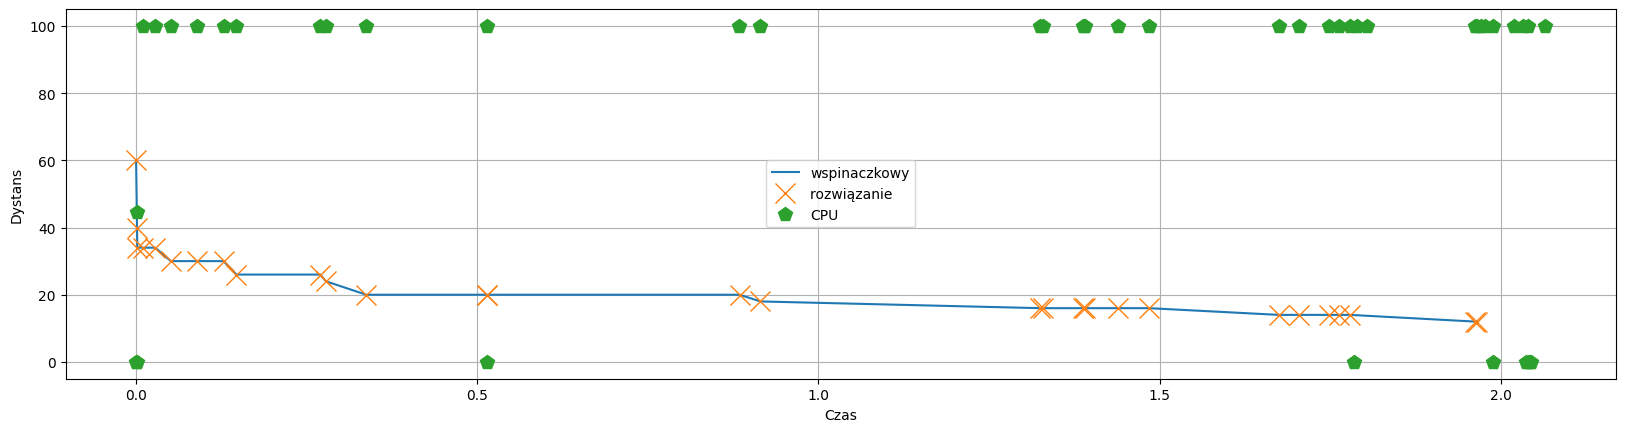

[0, 0.0009717941284179688, 0.012105464935302734, 0.023300886154174805, 0.025603532791137695, 0.027486562728881836, 0.03213953971862793, 0.04111361503601074, 0.042148590087890625, 0.04674124717712402, 0.04837536811828613, 0.05077075958251953, 0.06603622436523438, 0.07084536552429199, 0.07407689094543457, 0.08604192733764648, 0.08898043632507324, 0.10032868385314941, 0.10440969467163086, 0.1074368953704834, 0.11063885688781738, 0.1261143684387207, 0.16156721115112305, 0.3972196578979492, 0.5370643138885498, 0.540626049041748, 0.5470380783081055, 0.5565378665924072, 0.5617437362670898, 0.5624780654907227, 0.5679576396942139, 0.5707383155822754, 0.5730860233306885, 0.5760757923126221, 0.5763988494873047, 0.5845451354980469, 0.5882468223571777, 0.5958425998687744, 0.5994462966918945, 0.6121814250946045, 0.6514875888824463, 0.7023665904998779, 0.7628157138824463, 0.9459037780761719, 1.0245633125305176, 1.025639295578003, 1.0333073139190674, 1.0344693660736084, 1.0436546802520752, 1.046034336

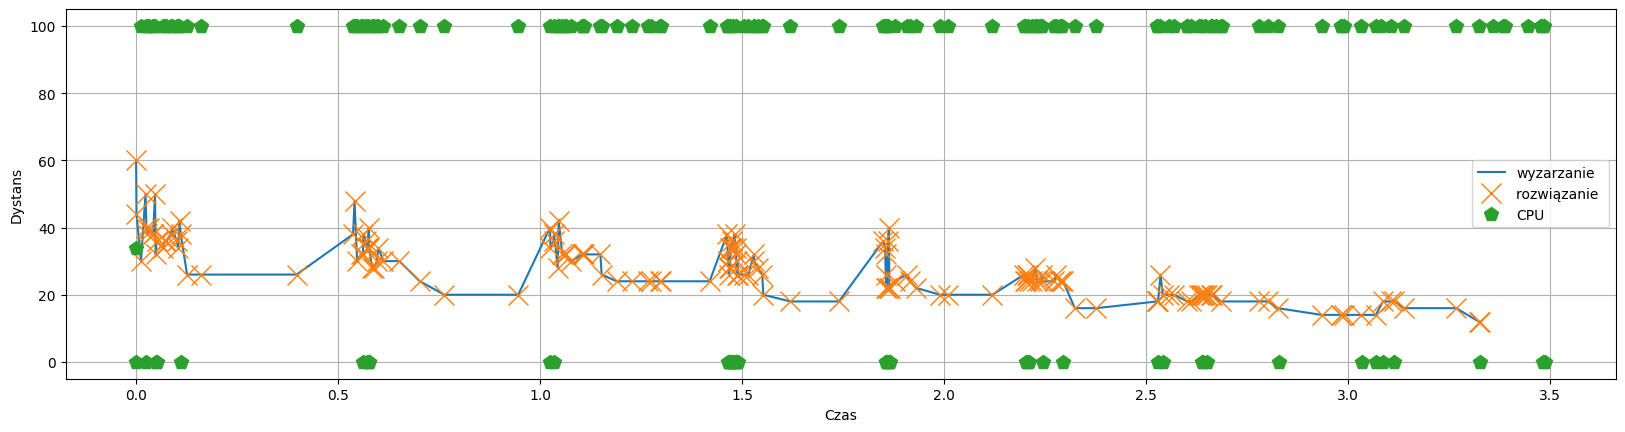

In [ ]:
import matplotlib.pyplot as plt


print(historia_wspinaczkowy_czas)
print(historia_wspinaczkowy_długość)

plt.figure().set_figwidth(20)

plt.plot (historia_wspinaczkowy_czas, historia_wspinaczkowy_długość, label = "wspinaczkowy")
plt.plot(historia_wspinaczkowy_czas,historia_wspinaczkowy_długość,'x', label="rozwiązanie ",ms = 15)
plt.plot(historia_wspinaczkowy_czas_procesor,historia_wspinaczkowy_procesor,'p', label="CPU",ms = 10)
plt.xlabel('Czas')
plt.ylabel('Dystans')
plt.legend()
plt.grid()
plt.show()

print( historia_wyzarzanie_czas)
print(historia_wyzarzanie_długość)
plt.figure().set_figwidth(20)
plt.plot (historia_wyzarzanie_czas, historia_wyzarzanie_długość, label = "wyzarzanie")
plt.plot(historia_wyzarzanie_czas,historia_wyzarzanie_długość,'x', label="rozwiązanie ",ms = 15)
plt.plot(historia_wyzarzanie_czas_procesor,historia_wyzarzanie_procesor,'p', label="CPU",ms = 10)
plt.xlabel('Czas')
plt.ylabel('Dystans')
plt.legend()
plt.grid()
plt.show()




# Wizualizacja

---



In [ ]:
from manim import *
import numpy as np
import random

Manim Community v0.17.3

In [ ]:
%%manim MojaScena


class MojaScena(Scene):
  def construct(self):
    print(historia_wspinaczkowy_długość)
    for i in range(1,len(historia_wspinaczkowy_długość) +1 , 1):
      circle = Circle(radius =historia_wspinaczkowy_długość[i-1]*0.12).set_stroke(color=random_color(), width=10)

      self.add(circle)
      self.wait(1)
  


[60, 40, 34, 34, 34, 30, 30, 30, 26, 26, 24, 20, 20, 20, 20, 18, 16, 16, 16, 16, 16, 16, 14, 14, 14, 14, 14, 12, 12]


[06/10/23 14:41:00] INFO     Animation 0 : Partial movie file written in                   ]8;id=993041;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=991727;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1413466013_1329314881_2338733820.mp4'                                         

INFO:manim:Animation 0 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1413466013_1329314881_2338733820.mp4'


[06/10/23 14:41:03] INFO     Animation 1 : Partial movie file written in                   ]8;id=794682;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=723272;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_1076466279_2641923156.mp4'                                         

INFO:manim:Animation 1 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_1076466279_2641923156.mp4'


[06/10/23 14:41:06] INFO     Animation 2 : Partial movie file written in                   ]8;id=402487;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=951303;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_1076466279_3337438638.mp4'                                         

INFO:manim:Animation 2 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_1076466279_3337438638.mp4'


[06/10/23 14:41:09] INFO     Animation 3 : Partial movie file written in                   ]8;id=555462;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=474554;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_1076466279_4017037995.mp4'                                         

INFO:manim:Animation 3 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_1076466279_4017037995.mp4'


[06/10/23 14:41:13] INFO     Animation 4 : Partial movie file written in                   ]8;id=837497;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=694099;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_1076466279_1539264810.mp4'                                         

INFO:manim:Animation 4 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_1076466279_1539264810.mp4'


[06/10/23 14:41:16] INFO     Animation 5 : Partial movie file written in                   ]8;id=89647;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=348219;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_1076466279_4117442240.mp4'                                         

INFO:manim:Animation 5 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_1076466279_4117442240.mp4'


[06/10/23 14:41:20] INFO     Animation 6 : Partial movie file written in                   ]8;id=809547;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=199300;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_1076466279_291365843.mp4'                                          

INFO:manim:Animation 6 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_1076466279_291365843.mp4'


[06/10/23 14:41:24] INFO     Animation 7 : Partial movie file written in                   ]8;id=821697;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=673304;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_1076466279_155123645.mp4'                                          

INFO:manim:Animation 7 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_1076466279_155123645.mp4'


[06/10/23 14:41:26] INFO     Animation 8 : Partial movie file written in                   ]8;id=495260;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=812833;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_1076466279_2001762064.mp4'                                         

INFO:manim:Animation 8 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_1076466279_2001762064.mp4'


[06/10/23 14:41:29] INFO     Animation 9 : Partial movie file written in                   ]8;id=811725;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=453006;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_1076466279_3073859489.mp4'                                         

INFO:manim:Animation 9 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_1076466279_3073859489.mp4'


[06/10/23 14:41:32] INFO     Animation 10 : Partial movie file written in                  ]8;id=306302;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=843238;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_1076466279_2894627211.mp4'                                         

INFO:manim:Animation 10 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_1076466279_2894627211.mp4'


[06/10/23 14:41:36] INFO     Animation 11 : Partial movie file written in                  ]8;id=354878;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=584341;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_1076466279_1635557094.mp4'                                         

INFO:manim:Animation 11 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_1076466279_1635557094.mp4'


[06/10/23 14:41:41] INFO     Animation 12 : Partial movie file written in                  ]8;id=754333;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=885929;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_1076466279_3116357284.mp4'                                         

INFO:manim:Animation 12 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_1076466279_3116357284.mp4'


[06/10/23 14:41:45] INFO     Animation 13 : Partial movie file written in                  ]8;id=240390;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=126594;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_1076466279_2702176469.mp4'                                         

INFO:manim:Animation 13 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_1076466279_2702176469.mp4'


[06/10/23 14:41:48] INFO     Animation 14 : Partial movie file written in                  ]8;id=389833;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=49349;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_1076466279_158361019.mp4'                                          

INFO:manim:Animation 14 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_1076466279_158361019.mp4'


[06/10/23 14:41:51] INFO     Animation 15 : Partial movie file written in                  ]8;id=820550;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=73119;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_1076466279_686989580.mp4'                                          

INFO:manim:Animation 15 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_1076466279_686989580.mp4'


[06/10/23 14:41:54] INFO     Animation 16 : Partial movie file written in                  ]8;id=50075;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=708337;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_1076466279_1849250993.mp4'                                         

INFO:manim:Animation 16 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_1076466279_1849250993.mp4'


[06/10/23 14:41:57] INFO     Animation 17 : Partial movie file written in                  ]8;id=428936;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=778528;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_1076466279_860685585.mp4'                                          

INFO:manim:Animation 17 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_1076466279_860685585.mp4'


[06/10/23 14:42:02] INFO     Animation 18 : Partial movie file written in                  ]8;id=228159;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=716024;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_1076466279_3035142460.mp4'                                         

INFO:manim:Animation 18 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_1076466279_3035142460.mp4'


[06/10/23 14:42:06] INFO     Animation 19 : Partial movie file written in                  ]8;id=699769;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=546382;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_1076466279_2938834561.mp4'                                         

INFO:manim:Animation 19 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_1076466279_2938834561.mp4'


[06/10/23 14:42:10] INFO     Animation 20 : Partial movie file written in                  ]8;id=397467;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=38315;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/3496982726_345352296_1825356571.mp4'                                          

INFO:manim:Animation 20 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/3496982726_345352296_1825356571.mp4'


[06/10/23 14:42:13] INFO     Animation 21 : Partial movie file written in                  ]8;id=596948;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=682130;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_1076466279_618201776.mp4'                                          

INFO:manim:Animation 21 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_1076466279_618201776.mp4'


[06/10/23 14:42:16] INFO     Animation 22 : Partial movie file written in                  ]8;id=3905;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=451298;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_1076466279_1435763961.mp4'                                         

INFO:manim:Animation 22 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_1076466279_1435763961.mp4'


[06/10/23 14:42:20] INFO     Animation 23 : Partial movie file written in                  ]8;id=573600;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=11066;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_1076466279_4271147782.mp4'                                         

INFO:manim:Animation 23 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_1076466279_4271147782.mp4'


[06/10/23 14:42:26] INFO     Animation 24 : Partial movie file written in                  ]8;id=203874;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=535024;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_1076466279_3775361136.mp4'                                         

INFO:manim:Animation 24 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_1076466279_3775361136.mp4'


[06/10/23 14:42:31] INFO     Animation 25 : Partial movie file written in                  ]8;id=5852;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=191354;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_1076466279_1621458415.mp4'                                         

INFO:manim:Animation 25 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_1076466279_1621458415.mp4'


[06/10/23 14:42:35] INFO     Animation 26 : Partial movie file written in                  ]8;id=458560;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=348839;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_1076466279_1962687428.mp4'                                         

INFO:manim:Animation 26 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_1076466279_1962687428.mp4'


[06/10/23 14:42:38] INFO     Animation 27 : Partial movie file written in                  ]8;id=802920;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=907701;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_1076466279_1289551028.mp4'                                         

INFO:manim:Animation 27 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_1076466279_1289551028.mp4'


[06/10/23 14:42:42] INFO     Animation 28 : Partial movie file written in                  ]8;id=735881;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=951897;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_1076466279_2182799725.mp4'                                         

INFO:manim:Animation 28 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_1076466279_2182799725.mp4'


                    INFO     Combining to Movie file.                                      ]8;id=810077;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=833484;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#617\617]8;;\

INFO:manim:Combining to Movie file.


                    INFO                                                                   ]8;id=851949;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=412709;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#736\736]8;;\
                             File ready at                                                                         
                             '/content/media/videos/content/1080p60/MojaScena.mp4'                                 
                                                                                                                   

INFO:manim:
File ready at '/content/media/videos/content/1080p60/MojaScena.mp4'



                    INFO     The partial movie directory is full (> 100 files). Therefore, ]8;id=108441;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=945977;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#708\708]8;;\
                             manim has removed the 30 oldest file(s). You can change this                          
                             behaviour by changing max_files_cached in config.                                     

INFO:manim:The partial movie directory is full (> 100 files). Therefore, manim has removed the 30 oldest file(s). You can change this behaviour by changing max_files_cached in config.


                    INFO     Rendered MojaScena                                                        ]8;id=284355;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene.py\scene.py]8;;\:]8;id=538915;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene.py#241\241]8;;\
                             Played 29 animations                                                                  

INFO:manim:Rendered MojaScena
Played 29 animations


In [ ]:
%%manim MojaScena

class MojaScena(Scene):
  def construct(self):
    print(historia_wyzarzanie_długość)
    for i in range(1,len(historia_wyzarzanie_długość) +1 , 1):
      circle = Circle(radius =historia_wyzarzanie_długość[i-1]*0.12).set_stroke(color=random_color(), width=10)

      self.add(circle)
      self.wait(0.5)


[60, 44, 42, 40, 38, 44, 40, 50, 40, 42, 48, 38, 42, 32, 36, 38, 40, 44, 34, 30, 28, 34, 32, 28, 28, 24, 34, 36, 26, 44, 34, 32, 38, 34, 30, 30, 34, 32, 36, 32, 30, 32, 30, 38, 38, 38, 34, 24, 20, 38, 24, 32, 42, 34, 38, 36, 22, 34, 34, 34, 36, 30, 28, 36, 38, 36, 32, 34, 34, 24, 24, 24, 24, 24, 22, 36, 46, 30, 34, 30, 30, 36, 36, 32, 30, 40, 28, 38, 30, 32, 38, 18, 18, 22, 22, 24, 26, 30, 30, 26, 24, 24, 24, 26, 22, 24, 24, 22, 22, 22, 20, 22, 22, 20, 20, 20, 22, 20, 20, 20, 24, 24, 16, 20, 26, 34, 26, 28, 26, 16, 28, 28, 28, 30, 30, 30, 28, 22, 22, 24, 20, 26, 22, 22, 22, 24, 18, 18, 20, 20, 20, 18, 18, 22, 22, 22, 18, 22, 24, 16, 16, 14, 14, 14, 14, 14, 18, 16, 18, 16, 18, 16, 12, 12]


[06/10/23 14:29:00] INFO     Animation 0 : Partial movie file written in                   ]8;id=235373;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=551700;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1413466013_2644758854_1450183828.mp4'                                         

INFO:manim:Animation 0 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1413466013_2644758854_1450183828.mp4'


[06/10/23 14:29:01] INFO     Animation 1 : Partial movie file written in                   ]8;id=55882;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=475566;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_3901276684.mp4'                                          

INFO:manim:Animation 1 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_3901276684.mp4'


[06/10/23 14:29:02] INFO     Animation 2 : Partial movie file written in                   ]8;id=117285;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=729586;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_2044681495.mp4'                                          

INFO:manim:Animation 2 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_2044681495.mp4'


[06/10/23 14:29:04] INFO     Animation 3 : Partial movie file written in                   ]8;id=370076;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=692765;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_2272854627.mp4'                                          

INFO:manim:Animation 3 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_2272854627.mp4'


[06/10/23 14:29:05] INFO     Animation 4 : Partial movie file written in                   ]8;id=292365;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=51924;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_329461460.mp4'                                           

INFO:manim:Animation 4 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_329461460.mp4'


[06/10/23 14:29:07] INFO     Animation 5 : Partial movie file written in                   ]8;id=780705;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=556656;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_2552653931.mp4'                                          

INFO:manim:Animation 5 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_2552653931.mp4'


[06/10/23 14:29:09] INFO     Animation 6 : Partial movie file written in                   ]8;id=254286;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=947269;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_2567827983.mp4'                                          

INFO:manim:Animation 6 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_2567827983.mp4'


[06/10/23 14:29:11] INFO     Animation 7 : Partial movie file written in                   ]8;id=353938;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=869348;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_3250135301.mp4'                                          

INFO:manim:Animation 7 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_3250135301.mp4'


[06/10/23 14:29:13] INFO     Animation 8 : Partial movie file written in                   ]8;id=292786;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=62411;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_3261430645.mp4'                                          

INFO:manim:Animation 8 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_3261430645.mp4'


[06/10/23 14:29:16] INFO     Animation 9 : Partial movie file written in                   ]8;id=110905;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=357878;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_3514338177.mp4'                                          

INFO:manim:Animation 9 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_3514338177.mp4'


[06/10/23 14:29:18] INFO     Animation 10 : Partial movie file written in                  ]8;id=933641;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=95246;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_1116661709.mp4'                                          

INFO:manim:Animation 10 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_1116661709.mp4'


[06/10/23 14:29:20] INFO     Animation 11 : Partial movie file written in                  ]8;id=366199;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=798197;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_1404821338.mp4'                                          

INFO:manim:Animation 11 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_1404821338.mp4'


[06/10/23 14:29:22] INFO     Animation 12 : Partial movie file written in                  ]8;id=524221;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=685386;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_3301459672.mp4'                                          

INFO:manim:Animation 12 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_3301459672.mp4'


[06/10/23 14:29:23] INFO     Animation 13 : Partial movie file written in                  ]8;id=879495;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=997531;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_976735323.mp4'                                           

INFO:manim:Animation 13 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_976735323.mp4'


[06/10/23 14:29:25] INFO     Animation 14 : Partial movie file written in                  ]8;id=869429;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=595214;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_2351065695.mp4'                                          

INFO:manim:Animation 14 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_2351065695.mp4'


[06/10/23 14:29:27] INFO     Animation 15 : Partial movie file written in                  ]8;id=104936;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=947002;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_241240568.mp4'                                           

INFO:manim:Animation 15 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_241240568.mp4'


[06/10/23 14:29:28] INFO     Animation 16 : Partial movie file written in                  ]8;id=559625;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=198119;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_1676180152.mp4'                                          

INFO:manim:Animation 16 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_1676180152.mp4'


[06/10/23 14:29:30] INFO     Animation 17 : Partial movie file written in                  ]8;id=836167;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=495307;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_704008273.mp4'                                           

INFO:manim:Animation 17 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_704008273.mp4'


[06/10/23 14:29:32] INFO     Animation 18 : Partial movie file written in                  ]8;id=246162;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=850975;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_2526496290_4134425820.mp4'                                         

INFO:manim:Animation 18 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_2526496290_4134425820.mp4'


[06/10/23 14:29:35] INFO     Animation 19 : Partial movie file written in                  ]8;id=322878;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=893414;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_3488411690.mp4'                                          

INFO:manim:Animation 19 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_3488411690.mp4'


[06/10/23 14:29:37] INFO     Animation 20 : Partial movie file written in                  ]8;id=749603;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=817317;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_1005456162.mp4'                                          

INFO:manim:Animation 20 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_1005456162.mp4'


[06/10/23 14:29:40] INFO     Animation 21 : Partial movie file written in                  ]8;id=8392;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=224122;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_883543621.mp4'                                           

INFO:manim:Animation 21 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_883543621.mp4'


[06/10/23 14:29:42] INFO     Animation 22 : Partial movie file written in                  ]8;id=538538;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=826136;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_4077213312.mp4'                                          

INFO:manim:Animation 22 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_4077213312.mp4'


[06/10/23 14:29:44] INFO     Animation 23 : Partial movie file written in                  ]8;id=889845;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=718712;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_1573498793.mp4'                                          

INFO:manim:Animation 23 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_1573498793.mp4'


[06/10/23 14:29:46] INFO     Animation 24 : Partial movie file written in                  ]8;id=400154;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=66320;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_3687865575.mp4'                                          

INFO:manim:Animation 24 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_3687865575.mp4'


[06/10/23 14:29:48] INFO     Animation 25 : Partial movie file written in                  ]8;id=957110;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=116715;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_4241263863.mp4'                                          

INFO:manim:Animation 25 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_4241263863.mp4'


[06/10/23 14:29:49] INFO     Animation 26 : Partial movie file written in                  ]8;id=258692;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=939299;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_1494522938.mp4'                                          

INFO:manim:Animation 26 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_1494522938.mp4'


[06/10/23 14:29:51] INFO     Animation 27 : Partial movie file written in                  ]8;id=65521;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=693928;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_2156230673.mp4'                                          

INFO:manim:Animation 27 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_2156230673.mp4'


[06/10/23 14:29:53] INFO     Animation 28 : Partial movie file written in                  ]8;id=259525;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=683155;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_3627342933.mp4'                                          

INFO:manim:Animation 28 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_3627342933.mp4'


[06/10/23 14:29:56] INFO     Animation 29 : Partial movie file written in                  ]8;id=903475;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=733607;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_1827620744.mp4'                                          

INFO:manim:Animation 29 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_1827620744.mp4'


[06/10/23 14:29:59] INFO     Animation 30 : Partial movie file written in                  ]8;id=124747;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=844364;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_3919739066.mp4'                                          

INFO:manim:Animation 30 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_3919739066.mp4'


[06/10/23 14:30:02] INFO     Animation 31 : Partial movie file written in                  ]8;id=762392;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=753799;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_2601526850.mp4'                                          

INFO:manim:Animation 31 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_2601526850.mp4'


[06/10/23 14:30:04] INFO     Animation 32 : Partial movie file written in                  ]8;id=325480;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=439004;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_1151206130.mp4'                                          

INFO:manim:Animation 32 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_1151206130.mp4'


[06/10/23 14:30:07] INFO     Animation 33 : Partial movie file written in                  ]8;id=135484;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=556325;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_3981657622.mp4'                                          

INFO:manim:Animation 33 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_3981657622.mp4'


[06/10/23 14:30:08] INFO     Animation 34 : Partial movie file written in                  ]8;id=982668;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=844692;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_1451110592.mp4'                                          

INFO:manim:Animation 34 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_1451110592.mp4'


[06/10/23 14:30:10] INFO     Animation 35 : Partial movie file written in                  ]8;id=936734;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=578589;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_205424849.mp4'                                           

INFO:manim:Animation 35 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_205424849.mp4'


[06/10/23 14:30:12] INFO     Animation 36 : Partial movie file written in                  ]8;id=1983;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=217955;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_989615521.mp4'                                           

INFO:manim:Animation 36 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_989615521.mp4'


[06/10/23 14:30:14] INFO     Animation 37 : Partial movie file written in                  ]8;id=554367;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=342609;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_327551123.mp4'                                           

INFO:manim:Animation 37 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_327551123.mp4'


[06/10/23 14:30:16] INFO     Animation 38 : Partial movie file written in                  ]8;id=605631;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=134076;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_2880931956.mp4'                                          

INFO:manim:Animation 38 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_2880931956.mp4'


[06/10/23 14:30:19] INFO     Animation 39 : Partial movie file written in                  ]8;id=941197;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=753068;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_3861316444.mp4'                                          

INFO:manim:Animation 39 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_3861316444.mp4'


[06/10/23 14:30:22] INFO     Animation 40 : Partial movie file written in                  ]8;id=24093;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=715697;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_3818443598.mp4'                                          

INFO:manim:Animation 40 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_3818443598.mp4'


[06/10/23 14:30:25] INFO     Animation 41 : Partial movie file written in                  ]8;id=762444;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=558816;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_1360917735.mp4'                                          

INFO:manim:Animation 41 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_1360917735.mp4'


[06/10/23 14:30:28] INFO     Animation 42 : Partial movie file written in                  ]8;id=240715;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=964257;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_1146731784.mp4'                                          

INFO:manim:Animation 42 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_1146731784.mp4'


[06/10/23 14:30:30] INFO     Animation 43 : Partial movie file written in                  ]8;id=985841;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=385652;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_2723610770.mp4'                                          

INFO:manim:Animation 43 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_2723610770.mp4'


[06/10/23 14:30:32] INFO     Animation 44 : Partial movie file written in                  ]8;id=68704;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=388006;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_3943343382.mp4'                                          

INFO:manim:Animation 44 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_3943343382.mp4'


[06/10/23 14:30:33] INFO     Animation 45 : Partial movie file written in                  ]8;id=719356;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=113842;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_3279780757.mp4'                                          

INFO:manim:Animation 45 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_3279780757.mp4'


[06/10/23 14:30:35] INFO     Animation 46 : Partial movie file written in                  ]8;id=575822;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=292145;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_2913901705.mp4'                                          

INFO:manim:Animation 46 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_2913901705.mp4'


[06/10/23 14:30:37] INFO     Animation 47 : Partial movie file written in                  ]8;id=818857;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=651558;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_955577214.mp4'                                           

INFO:manim:Animation 47 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_955577214.mp4'


[06/10/23 14:30:40] INFO     Animation 48 : Partial movie file written in                  ]8;id=212115;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=288754;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_3908124863.mp4'                                          

INFO:manim:Animation 48 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_3908124863.mp4'


[06/10/23 14:30:43] INFO     Animation 49 : Partial movie file written in                  ]8;id=15353;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=257081;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_707531527.mp4'                                           

INFO:manim:Animation 49 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_707531527.mp4'


[06/10/23 14:30:45] INFO     Animation 50 : Partial movie file written in                  ]8;id=195223;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=992193;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_1850799833.mp4'                                          

INFO:manim:Animation 50 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_1850799833.mp4'


[06/10/23 14:30:48] INFO     Animation 51 : Partial movie file written in                  ]8;id=274171;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=82628;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_3923203809.mp4'                                          

INFO:manim:Animation 51 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_3923203809.mp4'


[06/10/23 14:30:51] INFO     Animation 52 : Partial movie file written in                  ]8;id=225241;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=523282;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_899109708.mp4'                                           

INFO:manim:Animation 52 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_899109708.mp4'


[06/10/23 14:30:53] INFO     Animation 53 : Partial movie file written in                  ]8;id=171238;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=830425;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_3946725569.mp4'                                          

INFO:manim:Animation 53 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_3946725569.mp4'


[06/10/23 14:30:55] INFO     Animation 54 : Partial movie file written in                  ]8;id=138337;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=843254;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_3979461653.mp4'                                          

INFO:manim:Animation 54 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_3979461653.mp4'


[06/10/23 14:30:57] INFO     Animation 55 : Partial movie file written in                  ]8;id=361849;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=770516;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_1501539612.mp4'                                          

INFO:manim:Animation 55 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_1501539612.mp4'


[06/10/23 14:30:59] INFO     Animation 56 : Partial movie file written in                  ]8;id=701082;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=439536;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_2218149626.mp4'                                          

INFO:manim:Animation 56 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_2218149626.mp4'


[06/10/23 14:31:01] INFO     Animation 57 : Partial movie file written in                  ]8;id=139133;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=335459;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_3096054776.mp4'                                          

INFO:manim:Animation 57 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_3096054776.mp4'


[06/10/23 14:31:04] INFO     Animation 58 : Partial movie file written in                  ]8;id=101881;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=178890;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_4060403360.mp4'                                          

INFO:manim:Animation 58 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_4060403360.mp4'


[06/10/23 14:31:07] INFO     Animation 59 : Partial movie file written in                  ]8;id=297598;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=62865;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_2808536027.mp4'                                          

INFO:manim:Animation 59 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_2808536027.mp4'


[06/10/23 14:31:12] INFO     Animation 60 : Partial movie file written in                  ]8;id=681214;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=401696;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_1536565797.mp4'                                          

INFO:manim:Animation 60 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_1536565797.mp4'


[06/10/23 14:31:15] INFO     Animation 61 : Partial movie file written in                  ]8;id=236277;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=756411;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_952614155.mp4'                                           

INFO:manim:Animation 61 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_952614155.mp4'


[06/10/23 14:31:18] INFO     Animation 62 : Partial movie file written in                  ]8;id=703037;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=558833;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_2237843890.mp4'                                          

INFO:manim:Animation 62 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_2237843890.mp4'


[06/10/23 14:31:21] INFO     Animation 63 : Partial movie file written in                  ]8;id=588104;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=690578;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_2310273948.mp4'                                          

INFO:manim:Animation 63 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_2310273948.mp4'


[06/10/23 14:31:23] INFO     Animation 64 : Partial movie file written in                  ]8;id=795103;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=257516;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_3108754442.mp4'                                          

INFO:manim:Animation 64 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_3108754442.mp4'


[06/10/23 14:31:26] INFO     Animation 65 : Partial movie file written in                  ]8;id=671976;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=314439;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_376081943.mp4'                                           

INFO:manim:Animation 65 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_376081943.mp4'


[06/10/23 14:31:29] INFO     Animation 66 : Partial movie file written in                  ]8;id=854830;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=380823;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_83817513.mp4'                                            

INFO:manim:Animation 66 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_83817513.mp4'


[06/10/23 14:31:31] INFO     Animation 67 : Partial movie file written in                  ]8;id=282443;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=924122;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_916891290.mp4'                                           

INFO:manim:Animation 67 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_916891290.mp4'


[06/10/23 14:31:35] INFO     Animation 68 : Partial movie file written in                  ]8;id=490268;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=687245;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_1044584085.mp4'                                          

INFO:manim:Animation 68 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_1044584085.mp4'


[06/10/23 14:31:37] INFO     Animation 69 : Partial movie file written in                  ]8;id=673258;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=595456;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_444307584.mp4'                                           

INFO:manim:Animation 69 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_444307584.mp4'


[06/10/23 14:31:40] INFO     Animation 70 : Partial movie file written in                  ]8;id=719568;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=193304;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_1744495395.mp4'                                          

INFO:manim:Animation 70 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_1744495395.mp4'


[06/10/23 14:31:42] INFO     Animation 71 : Partial movie file written in                  ]8;id=525359;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=578842;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_2920270824.mp4'                                          

INFO:manim:Animation 71 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_2920270824.mp4'


[06/10/23 14:31:43] INFO     Animation 72 : Partial movie file written in                  ]8;id=385162;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=557886;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_3865217311.mp4'                                          

INFO:manim:Animation 72 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_3865217311.mp4'


[06/10/23 14:31:45] INFO     Animation 73 : Partial movie file written in                  ]8;id=496704;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=558728;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_953001.mp4'                                              

INFO:manim:Animation 73 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_953001.mp4'


[06/10/23 14:31:47] INFO     Animation 74 : Partial movie file written in                  ]8;id=412300;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=561563;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_1638660794.mp4'                                          

INFO:manim:Animation 74 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_1638660794.mp4'


[06/10/23 14:31:50] INFO     Animation 75 : Partial movie file written in                  ]8;id=498522;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=84364;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_3098466248.mp4'                                          

INFO:manim:Animation 75 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_3098466248.mp4'


[06/10/23 14:31:53] INFO     Animation 76 : Partial movie file written in                  ]8;id=354057;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=933342;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_177775491.mp4'                                           

INFO:manim:Animation 76 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_177775491.mp4'


[06/10/23 14:31:56] INFO     Animation 77 : Partial movie file written in                  ]8;id=484032;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=510004;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_4082143708.mp4'                                          

INFO:manim:Animation 77 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_4082143708.mp4'


[06/10/23 14:31:59] INFO     Animation 78 : Partial movie file written in                  ]8;id=629186;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=463210;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_2364913537.mp4'                                          

INFO:manim:Animation 78 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_2364913537.mp4'


[06/10/23 14:32:02] INFO     Animation 79 : Partial movie file written in                  ]8;id=569657;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=771300;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_2536480302.mp4'                                          

INFO:manim:Animation 79 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_2536480302.mp4'


[06/10/23 14:32:04] INFO     Animation 80 : Partial movie file written in                  ]8;id=680801;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=292488;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_2614884011.mp4'                                          

INFO:manim:Animation 80 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_2614884011.mp4'


[06/10/23 14:32:06] INFO     Animation 81 : Partial movie file written in                  ]8;id=345597;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=573467;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_3778965496.mp4'                                          

INFO:manim:Animation 81 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_3778965496.mp4'


[06/10/23 14:32:08] INFO     Animation 82 : Partial movie file written in                  ]8;id=980654;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=611135;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_3035096046.mp4'                                          

INFO:manim:Animation 82 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_3035096046.mp4'


[06/10/23 14:32:10] INFO     Animation 83 : Partial movie file written in                  ]8;id=752299;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=301126;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_2023955333.mp4'                                          

INFO:manim:Animation 83 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_2023955333.mp4'


[06/10/23 14:32:13] INFO     Animation 84 : Partial movie file written in                  ]8;id=375744;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=566339;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_2669572371.mp4'                                          

INFO:manim:Animation 84 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_2669572371.mp4'


[06/10/23 14:32:16] INFO     Animation 85 : Partial movie file written in                  ]8;id=408880;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=433102;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_1734879022.mp4'                                          

INFO:manim:Animation 85 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_1734879022.mp4'


[06/10/23 14:32:19] INFO     Animation 86 : Partial movie file written in                  ]8;id=412948;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=895068;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_1562171846.mp4'                                          

INFO:manim:Animation 86 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_1562171846.mp4'


[06/10/23 14:32:22] INFO     Animation 87 : Partial movie file written in                  ]8;id=704402;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=29157;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_1952086978.mp4'                                          

INFO:manim:Animation 87 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_1952086978.mp4'


[06/10/23 14:32:25] INFO     Animation 88 : Partial movie file written in                  ]8;id=534342;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=636715;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_2526496290_3990691696.mp4'                                         

INFO:manim:Animation 88 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_2526496290_3990691696.mp4'


[06/10/23 14:32:27] INFO     Animation 89 : Partial movie file written in                  ]8;id=545591;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=419716;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_2892461045.mp4'                                          

INFO:manim:Animation 89 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_2892461045.mp4'


[06/10/23 14:32:29] INFO     Animation 90 : Partial movie file written in                  ]8;id=862223;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=925438;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_3840568725.mp4'                                          

INFO:manim:Animation 90 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_3840568725.mp4'


[06/10/23 14:32:31] INFO     Animation 91 : Partial movie file written in                  ]8;id=710686;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=973264;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_1032359912.mp4'                                          

INFO:manim:Animation 91 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_1032359912.mp4'


[06/10/23 14:32:33] INFO     Animation 92 : Partial movie file written in                  ]8;id=232238;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=211467;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_446338942.mp4'                                           

INFO:manim:Animation 92 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_446338942.mp4'


[06/10/23 14:32:36] INFO     Animation 93 : Partial movie file written in                  ]8;id=130686;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=970000;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_3182989134.mp4'                                          

INFO:manim:Animation 93 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_3182989134.mp4'


[06/10/23 14:32:39] INFO     Animation 94 : Partial movie file written in                  ]8;id=473654;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=804795;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_3270366407.mp4'                                          

INFO:manim:Animation 94 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_3270366407.mp4'


[06/10/23 14:32:42] INFO     Animation 95 : Partial movie file written in                  ]8;id=44153;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=416102;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_3304876964.mp4'                                          

INFO:manim:Animation 95 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_3304876964.mp4'


[06/10/23 14:32:45] INFO     Animation 96 : Partial movie file written in                  ]8;id=556463;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=899292;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_3125887815.mp4'                                          

INFO:manim:Animation 96 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_3125887815.mp4'


[06/10/23 14:32:48] INFO     Animation 97 : Partial movie file written in                  ]8;id=249182;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=851381;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_2159511668.mp4'                                          

INFO:manim:Animation 97 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_2159511668.mp4'


[06/10/23 14:32:50] INFO     Animation 98 : Partial movie file written in                  ]8;id=321425;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=260148;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_3663635973.mp4'                                          

INFO:manim:Animation 98 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_3663635973.mp4'


[06/10/23 14:32:52] INFO     Animation 99 : Partial movie file written in                  ]8;id=802027;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=381362;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_4181991393.mp4'                                          

INFO:manim:Animation 99 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_4181991393.mp4'


[06/10/23 14:32:54] INFO     Animation 100 : Partial movie file written in                 ]8;id=991559;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=357962;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_480044268.mp4'                                           

INFO:manim:Animation 100 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_480044268.mp4'


[06/10/23 14:32:57] INFO     Animation 101 : Partial movie file written in                 ]8;id=812940;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=85211;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_3023530299.mp4'                                          

INFO:manim:Animation 101 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_3023530299.mp4'


[06/10/23 14:33:00] INFO     Animation 102 : Partial movie file written in                 ]8;id=945471;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=103320;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_178928904.mp4'                                           

INFO:manim:Animation 102 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_178928904.mp4'


[06/10/23 14:33:03] INFO     Animation 103 : Partial movie file written in                 ]8;id=143497;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=257811;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_1105507499.mp4'                                          

INFO:manim:Animation 103 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_1105507499.mp4'


[06/10/23 14:33:06] INFO     Animation 104 : Partial movie file written in                 ]8;id=987740;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=633488;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_1885818920.mp4'                                          

INFO:manim:Animation 104 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_1885818920.mp4'


[06/10/23 14:33:09] INFO     Animation 105 : Partial movie file written in                 ]8;id=995084;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=824134;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_2369768266.mp4'                                          

INFO:manim:Animation 105 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_2369768266.mp4'


[06/10/23 14:33:12] INFO     Animation 106 : Partial movie file written in                 ]8;id=39249;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=50623;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_1421612271.mp4'                                          

INFO:manim:Animation 106 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_1421612271.mp4'


[06/10/23 14:33:14] INFO     Animation 107 : Partial movie file written in                 ]8;id=162849;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=986250;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_3204970162.mp4'                                          

INFO:manim:Animation 107 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_3204970162.mp4'


[06/10/23 14:33:16] INFO     Animation 108 : Partial movie file written in                 ]8;id=762437;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=159487;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_1477114257.mp4'                                          

INFO:manim:Animation 108 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_1477114257.mp4'


[06/10/23 14:33:18] INFO     Animation 109 : Partial movie file written in                 ]8;id=884726;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=120687;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_3579865031.mp4'                                          

INFO:manim:Animation 109 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_3579865031.mp4'


[06/10/23 14:33:20] INFO     Animation 110 : Partial movie file written in                 ]8;id=897718;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=566670;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_4171736174.mp4'                                          

INFO:manim:Animation 110 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_4171736174.mp4'


[06/10/23 14:33:23] INFO     Animation 111 : Partial movie file written in                 ]8;id=494593;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=69519;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_3717363957.mp4'                                          

INFO:manim:Animation 111 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_3717363957.mp4'


[06/10/23 14:33:27] INFO     Animation 112 : Partial movie file written in                 ]8;id=742856;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=747332;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_831885102.mp4'                                           

INFO:manim:Animation 112 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_831885102.mp4'


[06/10/23 14:33:30] INFO     Animation 113 : Partial movie file written in                 ]8;id=945548;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=437082;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_2523227734.mp4'                                          

INFO:manim:Animation 113 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_2523227734.mp4'


[06/10/23 14:33:33] INFO     Animation 114 : Partial movie file written in                 ]8;id=325673;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=221578;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_3302017470.mp4'                                          

INFO:manim:Animation 114 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_3302017470.mp4'


[06/10/23 14:33:35] INFO     Animation 115 : Partial movie file written in                 ]8;id=434978;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=418018;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_1149355609.mp4'                                          

INFO:manim:Animation 115 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_1149355609.mp4'


[06/10/23 14:33:38] INFO     Animation 116 : Partial movie file written in                 ]8;id=225077;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=634965;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_3961684759.mp4'                                          

INFO:manim:Animation 116 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_3961684759.mp4'


[06/10/23 14:33:40] INFO     Animation 117 : Partial movie file written in                 ]8;id=840461;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=272504;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_214640774.mp4'                                           

INFO:manim:Animation 117 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_214640774.mp4'


[06/10/23 14:33:42] INFO     Animation 118 : Partial movie file written in                 ]8;id=44415;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=403947;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_777571646.mp4'                                           

INFO:manim:Animation 118 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_777571646.mp4'


[06/10/23 14:33:45] INFO     Animation 119 : Partial movie file written in                 ]8;id=253939;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=668926;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_1321360334.mp4'                                          

INFO:manim:Animation 119 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_1321360334.mp4'


[06/10/23 14:33:49] INFO     Animation 120 : Partial movie file written in                 ]8;id=686967;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=699856;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_959058837.mp4'                                           

INFO:manim:Animation 120 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_959058837.mp4'


[06/10/23 14:33:52] INFO     Animation 121 : Partial movie file written in                 ]8;id=775951;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=307228;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_4203828680.mp4'                                          

INFO:manim:Animation 121 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_4203828680.mp4'


[06/10/23 14:33:55] INFO     Animation 122 : Partial movie file written in                 ]8;id=140622;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=804825;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_4220252444.mp4'                                          

INFO:manim:Animation 122 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_4220252444.mp4'


[06/10/23 14:33:58] INFO     Animation 123 : Partial movie file written in                 ]8;id=195853;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=12710;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_3804995831.mp4'                                          

INFO:manim:Animation 123 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_3804995831.mp4'


[06/10/23 14:34:00] INFO     Animation 124 : Partial movie file written in                 ]8;id=898079;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=808695;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_3213396843.mp4'                                          

INFO:manim:Animation 124 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_3213396843.mp4'


[06/10/23 14:34:02] INFO     Animation 125 : Partial movie file written in                 ]8;id=525950;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=91233;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_3189352332.mp4'                                          

INFO:manim:Animation 125 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_3189352332.mp4'


[06/10/23 14:34:04] INFO     Animation 126 : Partial movie file written in                 ]8;id=194524;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=778830;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_3361652344.mp4'                                          

INFO:manim:Animation 126 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_3361652344.mp4'


[06/10/23 14:34:06] INFO     Animation 127 : Partial movie file written in                 ]8;id=885617;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=765143;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_2072620699.mp4'                                          

INFO:manim:Animation 127 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_2072620699.mp4'


[06/10/23 14:34:10] INFO     Animation 128 : Partial movie file written in                 ]8;id=942315;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=967787;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_831970294.mp4'                                           

INFO:manim:Animation 128 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_831970294.mp4'


[06/10/23 14:34:13] INFO     Animation 129 : Partial movie file written in                 ]8;id=804251;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=432789;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_3310077668.mp4'                                          

INFO:manim:Animation 129 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_3310077668.mp4'


[06/10/23 14:34:17] INFO     Animation 130 : Partial movie file written in                 ]8;id=500824;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=85414;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_812861946.mp4'                                           

INFO:manim:Animation 130 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_812861946.mp4'


[06/10/23 14:34:19] INFO     Animation 131 : Partial movie file written in                 ]8;id=360920;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=730120;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_2845856716.mp4'                                          

INFO:manim:Animation 131 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_2845856716.mp4'


[06/10/23 14:34:22] INFO     Animation 132 : Partial movie file written in                 ]8;id=589007;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=772995;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_3308062212.mp4'                                          

INFO:manim:Animation 132 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_3308062212.mp4'


[06/10/23 14:34:24] INFO     Animation 133 : Partial movie file written in                 ]8;id=333729;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=823529;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_510352878.mp4'                                           

INFO:manim:Animation 133 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_510352878.mp4'


[06/10/23 14:34:26] INFO     Animation 134 : Partial movie file written in                 ]8;id=979539;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=159372;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_3268382845.mp4'                                          

INFO:manim:Animation 134 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_3268382845.mp4'


[06/10/23 14:34:28] INFO     Animation 135 : Partial movie file written in                 ]8;id=382071;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=101819;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_2733255557.mp4'                                          

INFO:manim:Animation 135 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_2733255557.mp4'


[06/10/23 14:34:32] INFO     Animation 136 : Partial movie file written in                 ]8;id=173769;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=120271;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_591152262.mp4'                                           

INFO:manim:Animation 136 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_591152262.mp4'


[06/10/23 14:34:35] INFO     Animation 137 : Partial movie file written in                 ]8;id=69233;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=175566;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_3985844166.mp4'                                          

INFO:manim:Animation 137 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_3985844166.mp4'


[06/10/23 14:34:39] INFO     Animation 138 : Partial movie file written in                 ]8;id=163146;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=577292;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_3685114762.mp4'                                          

INFO:manim:Animation 138 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_3685114762.mp4'


[06/10/23 14:34:42] INFO     Animation 139 : Partial movie file written in                 ]8;id=372933;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=214670;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_2606957589.mp4'                                          

INFO:manim:Animation 139 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_2606957589.mp4'


[06/10/23 14:34:44] INFO     Animation 140 : Partial movie file written in                 ]8;id=918913;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=63697;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_4138283523.mp4'                                          

INFO:manim:Animation 140 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_4138283523.mp4'


[06/10/23 14:34:46] INFO     Animation 141 : Partial movie file written in                 ]8;id=487020;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=190548;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_1889987314.mp4'                                          

INFO:manim:Animation 141 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_1889987314.mp4'


[06/10/23 14:34:49] INFO     Animation 142 : Partial movie file written in                 ]8;id=379822;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=61407;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_3770458142.mp4'                                          

INFO:manim:Animation 142 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_3770458142.mp4'


[06/10/23 14:34:51] INFO     Animation 143 : Partial movie file written in                 ]8;id=253655;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=210872;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_3473922802.mp4'                                          

INFO:manim:Animation 143 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_3473922802.mp4'


[06/10/23 14:34:54] INFO     Animation 144 : Partial movie file written in                 ]8;id=120551;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=687819;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_2822896852.mp4'                                          

INFO:manim:Animation 144 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_2822896852.mp4'


[06/10/23 14:34:58] INFO     Animation 145 : Partial movie file written in                 ]8;id=167656;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=86204;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_444920430.mp4'                                           

INFO:manim:Animation 145 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_444920430.mp4'


[06/10/23 14:35:02] INFO     Animation 146 : Partial movie file written in                 ]8;id=539904;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=54154;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_4024173353.mp4'                                          

INFO:manim:Animation 146 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_4024173353.mp4'


[06/10/23 14:35:05] INFO     Animation 147 : Partial movie file written in                 ]8;id=277444;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=52866;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_3954667097.mp4'                                          

INFO:manim:Animation 147 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_3954667097.mp4'


[06/10/23 14:35:09] INFO     Animation 148 : Partial movie file written in                 ]8;id=242106;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=44110;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_457089130.mp4'                                           

INFO:manim:Animation 148 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_457089130.mp4'


[06/10/23 14:35:11] INFO     Animation 149 : Partial movie file written in                 ]8;id=877117;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=813408;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_153802249.mp4'                                           

INFO:manim:Animation 149 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_153802249.mp4'


[06/10/23 14:35:13] INFO     Animation 150 : Partial movie file written in                 ]8;id=863318;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=325139;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_3722929992.mp4'                                          

INFO:manim:Animation 150 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_3722929992.mp4'


[06/10/23 14:35:15] INFO     Animation 151 : Partial movie file written in                 ]8;id=107870;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=699963;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_548511741.mp4'                                           

INFO:manim:Animation 151 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_548511741.mp4'


[06/10/23 14:35:19] INFO     Animation 152 : Partial movie file written in                 ]8;id=483960;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=777571;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_1584399003.mp4'                                          

INFO:manim:Animation 152 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_1584399003.mp4'


[06/10/23 14:35:22] INFO     Animation 153 : Partial movie file written in                 ]8;id=114148;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=549531;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_3366650420.mp4'                                          

INFO:manim:Animation 153 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_3366650420.mp4'


[06/10/23 14:35:26] INFO     Animation 154 : Partial movie file written in                 ]8;id=615343;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=961020;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_2966749933.mp4'                                          

INFO:manim:Animation 154 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_2966749933.mp4'


[06/10/23 14:35:29] INFO     Animation 155 : Partial movie file written in                 ]8;id=882858;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=741298;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_390999601.mp4'                                           

INFO:manim:Animation 155 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_390999601.mp4'


[06/10/23 14:35:31] INFO     Animation 156 : Partial movie file written in                 ]8;id=704172;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=239373;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_3142166463.mp4'                                          

INFO:manim:Animation 156 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_3142166463.mp4'


[06/10/23 14:35:33] INFO     Animation 157 : Partial movie file written in                 ]8;id=417416;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=752312;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_2476122267.mp4'                                          

INFO:manim:Animation 157 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_2476122267.mp4'


[06/10/23 14:35:36] INFO     Animation 158 : Partial movie file written in                 ]8;id=451841;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=340298;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_1563425139.mp4'                                          

INFO:manim:Animation 158 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_1563425139.mp4'


[06/10/23 14:35:38] INFO     Animation 159 : Partial movie file written in                 ]8;id=438427;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=411808;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_3173312473.mp4'                                          

INFO:manim:Animation 159 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_3173312473.mp4'


[06/10/23 14:35:41] INFO     Animation 160 : Partial movie file written in                 ]8;id=34488;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=747195;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_2530430003.mp4'                                          

INFO:manim:Animation 160 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_2530430003.mp4'


[06/10/23 14:35:44] INFO     Animation 161 : Partial movie file written in                 ]8;id=756956;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=222267;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_1682788480.mp4'                                          

INFO:manim:Animation 161 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_1682788480.mp4'


[06/10/23 14:35:48] INFO     Animation 162 : Partial movie file written in                 ]8;id=695282;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=864538;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_2775204571.mp4'                                          

INFO:manim:Animation 162 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_2775204571.mp4'


[06/10/23 14:35:52] INFO     Animation 163 : Partial movie file written in                 ]8;id=542183;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=235078;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_878524810.mp4'                                           

INFO:manim:Animation 163 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_878524810.mp4'


[06/10/23 14:35:54] INFO     Animation 164 : Partial movie file written in                 ]8;id=779287;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=137439;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_3913647937.mp4'                                          

INFO:manim:Animation 164 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_3913647937.mp4'


[06/10/23 14:35:56] INFO     Animation 165 : Partial movie file written in                 ]8;id=361842;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=521941;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_3010606959.mp4'                                          

INFO:manim:Animation 165 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_3010606959.mp4'


[06/10/23 14:35:59] INFO     Animation 166 : Partial movie file written in                 ]8;id=642596;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=678030;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_1478975081.mp4'                                          

INFO:manim:Animation 166 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_1478975081.mp4'


[06/10/23 14:36:01] INFO     Animation 167 : Partial movie file written in                 ]8;id=537787;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=551233;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_794237282.mp4'                                           

INFO:manim:Animation 167 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_794237282.mp4'


[06/10/23 14:36:04] INFO     Animation 168 : Partial movie file written in                 ]8;id=416845;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=512296;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_2875698614.mp4'                                          

INFO:manim:Animation 168 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_2875698614.mp4'


[06/10/23 14:36:08] INFO     Animation 169 : Partial movie file written in                 ]8;id=690700;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=264311;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_1065626711.mp4'                                          

INFO:manim:Animation 169 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_1065626711.mp4'


[06/10/23 14:36:11] INFO     Animation 170 : Partial movie file written in                 ]8;id=598752;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=247187;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_2115967042.mp4'                                          

INFO:manim:Animation 170 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_2115967042.mp4'


[06/10/23 14:36:15] INFO     Animation 171 : Partial movie file written in                 ]8;id=359893;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=44730;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_737913332.mp4'                                           

INFO:manim:Animation 171 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_737913332.mp4'


[06/10/23 14:36:17] INFO     Animation 172 : Partial movie file written in                 ]8;id=830026;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=715818;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_1509681738.mp4'                                          

INFO:manim:Animation 172 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_1509681738.mp4'


[06/10/23 14:36:19] INFO     Animation 173 : Partial movie file written in                 ]8;id=385465;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=799035;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/content/media/videos/content/1080p60/partial_movie_files/Mo                         
                             jaScena/1672018281_645682970_3641059042.mp4'                                          

INFO:manim:Animation 173 : Partial movie file written in '/content/media/videos/content/1080p60/partial_movie_files/MojaScena/1672018281_645682970_3641059042.mp4'


                    INFO     Combining to Movie file.                                      ]8;id=99630;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=639665;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#617\617]8;;\

INFO:manim:Combining to Movie file.


[06/10/23 14:36:25] INFO                                                                   ]8;id=752144;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=583378;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#736\736]8;;\
                             File ready at                                                                         
                             '/content/media/videos/content/1080p60/MojaScena.mp4'                                 
                                                                                                                   

INFO:manim:
File ready at '/content/media/videos/content/1080p60/MojaScena.mp4'



                    INFO     The partial movie directory is full (> 100 files). Therefore, ]8;id=703437;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=993106;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene_file_writer.py#708\708]8;;\
                             manim has removed the 121 oldest file(s). You can change this                         
                             behaviour by changing max_files_cached in config.                                     

INFO:manim:The partial movie directory is full (> 100 files). Therefore, manim has removed the 121 oldest file(s). You can change this behaviour by changing max_files_cached in config.


                    INFO     Rendered MojaScena                                                        ]8;id=849016;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene.py\scene.py]8;;\:]8;id=359933;file:///usr/local/lib/python3.10/dist-packages/manim/scene/scene.py#241\241]8;;\
                             Played 174 animations                                                                 

INFO:manim:Rendered MojaScena
Played 174 animations


Tworzenie grafu polega na stworzeniu słownika "graph", który rysuje graf na podstawie podanych krawędzi, następnie wypisuje listę sąsiadów dla każdego wierzchołka.